<a href="https://colab.research.google.com/github/Dhanuja29/dhan/blob/new/Major_Project(Covid_19_pandemic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from fbprophet import Prophet

In [ ]:
#Importing the dataset
df=pd.read_excel('/content/owid-covid-data.xlsx')

In [ ]:
df.nunique()

iso_code                                   219
continent                                    6
location                                   219
date                                       490
total_cases                              45506
new_cases                                11706
new_cases_smoothed                       22373
total_deaths                             17356
new_deaths                                2758
new_deaths_smoothed                       6224
total_cases_per_million                  64891
new_cases_per_million                    37114
new_cases_smoothed_per_million           41851
total_deaths_per_million                 40247
new_deaths_per_million                    7148
new_deaths_smoothed_per_million           8481
reproduction_rate                          366
icu_patients                              2369
icu_patients_per_million                  4965
hosp_patients                             4607
hosp_patients_per_million                 8199
weekly_icu_ad

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85989 entries, 0 to 85988
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               85989 non-null  object        
 1   continent                              81842 non-null  object        
 2   location                               85989 non-null  object        
 3   date                                   85989 non-null  datetime64[ns]
 4   total_cases                            83868 non-null  float64       
 5   new_cases                              83866 non-null  float64       
 6   new_cases_smoothed                     82865 non-null  float64       
 7   total_deaths                           74172 non-null  float64       
 8   new_deaths                             74330 non-null  float64       
 9   new_deaths_smoothed                    82865 non-null  float6

In [ ]:
df.shape

(85989, 59)

In [ ]:
#Preprocessing of the data
df=df.fillna(0)

In [ ]:
df.head(12)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.0,0.026,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,0.0,0.0,0.0,0.026,0.000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,0.0,0.0,0.0,0.026,0.000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,0.0,0.0,0.0,0.051,0.026,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,0.0,0.0,0.0,0.103,0.051,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
df.isnull().sum()

iso_code                                 0
continent                                0
location                                 0
date                                     0
total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
icu_patients                             0
icu_patients_per_million                 0
hosp_patients                            0
hosp_patients_per_million                0
weekly_icu_admissions                    0
weekly_icu_admissions_per_million        0
weekly_hosp

In [ ]:
#Forecasting of data:
df=df.rename(columns={'date':'ds','new_cases':'y'})

In [ ]:
df_cases=df[df['continent']=='Asia']

In [ ]:
#Forecast for next 30 days of Asia Region
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.6)
model.fit(df_cases)
forecast=model.make_future_dataframe(periods=30,freq='D')#periods is number of days and frequency is D=days,M=months
forecast=model.predict(forecast)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


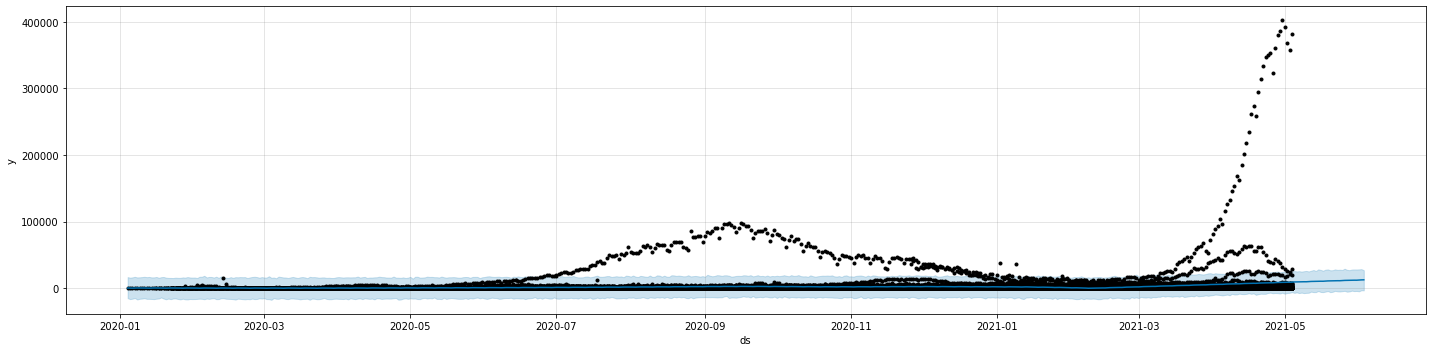

In [ ]:
model.plot(forecast,figsize=(20,5));

In [ ]:
df_cases1=df[df['continent']=='Africa']

In [ ]:
#Forecast for next 30 days of Africa Region
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.7)
model.fit(df_cases1)
forecast=model.make_future_dataframe(periods=30,freq='D')#periods is number of days and frequency is D=days,M=months
forecast=model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


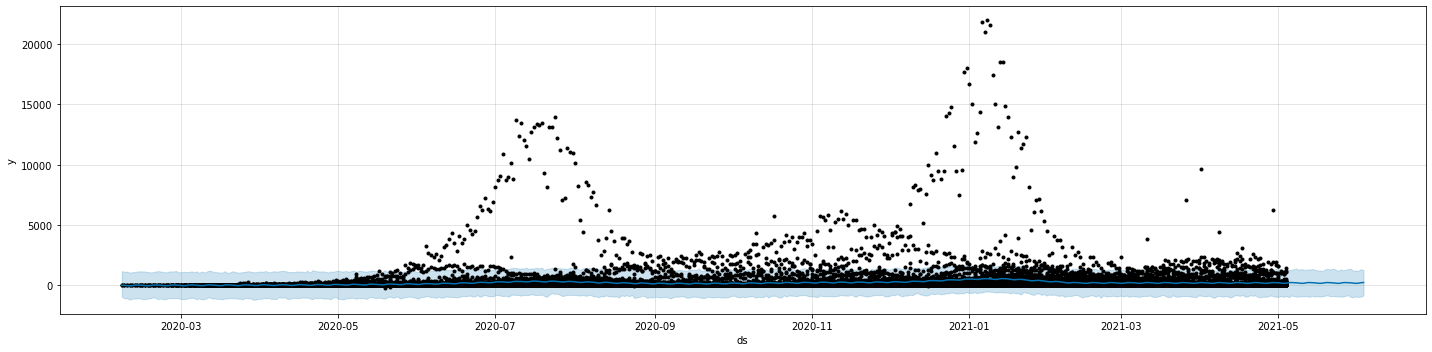

In [ ]:
model.plot(forecast,figsize=(20,5));

In [ ]:
df_cases2=df[df['continent']=='Europe']

In [ ]:
#Forecast for next 30 days of Europe Region
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.6)
model.fit(df_cases2)
forecast=model.make_future_dataframe(periods=30,freq='D')#periods is number of days and frequency is D=days,M=months
forecast=model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


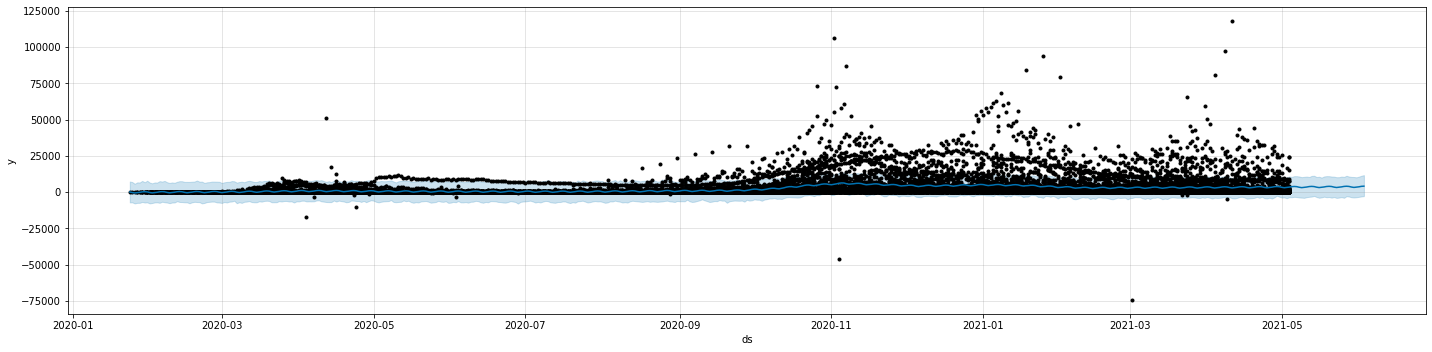

In [ ]:
model.plot(forecast,figsize=(20,5));

In [ ]:
df_cases3=df[df['continent']=='Oceania']

In [ ]:
#Forecast for next 30 days of Oceania Region
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.6)
model.fit(df_cases3)
forecast=model.make_future_dataframe(periods=30,freq='D')#periods is number of days and frequency is D=days,M=months
forecast=model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


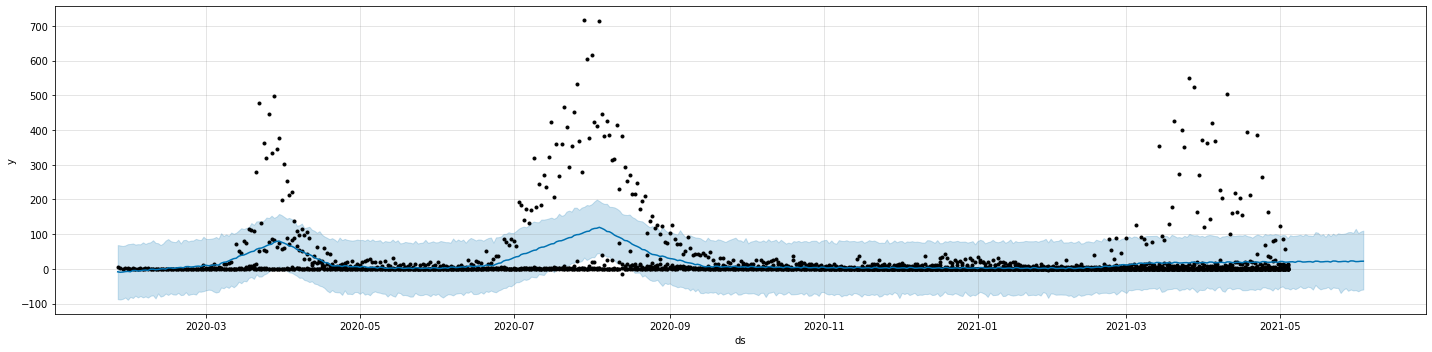

In [ ]:
model.plot(forecast,figsize=(20,5));

In [ ]:
df_cases4=df[df['continent']=='North America']

In [ ]:
#Forecast for next 30 days of North America Region
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.8)
model.fit(df_cases4)
forecast=model.make_future_dataframe(periods=30,freq='D')#periods is number of days and frequency is D=days,M=months
forecast=model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


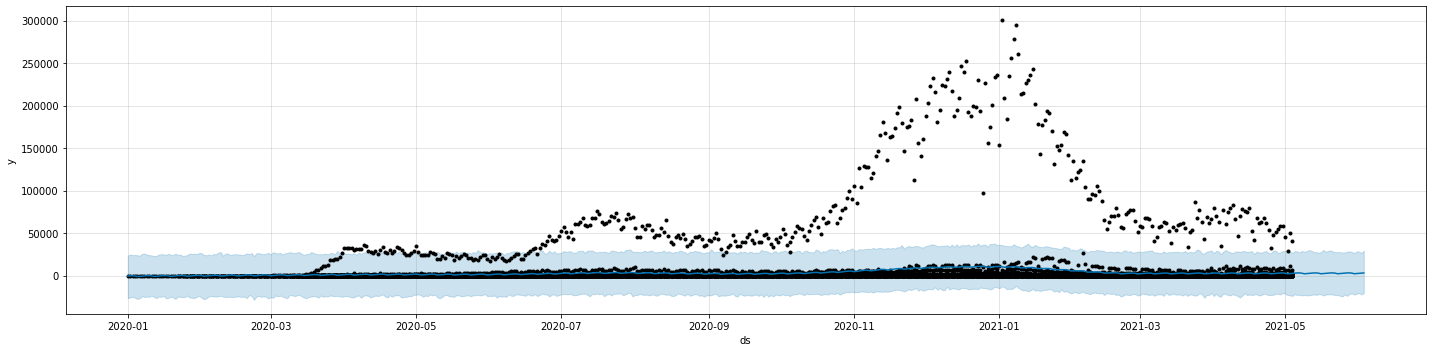

In [ ]:
model.plot(forecast,figsize=(20,5));

In [ ]:
df_cases5=df[df['continent']=='South America']

In [ ]:
#Forecast for next 30 days of South America Region
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.6)
model.fit(df_cases5)
forecast=model.make_future_dataframe(periods=30,freq='D')#periods is number of days and frequency is D=days,M=months
forecast=model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


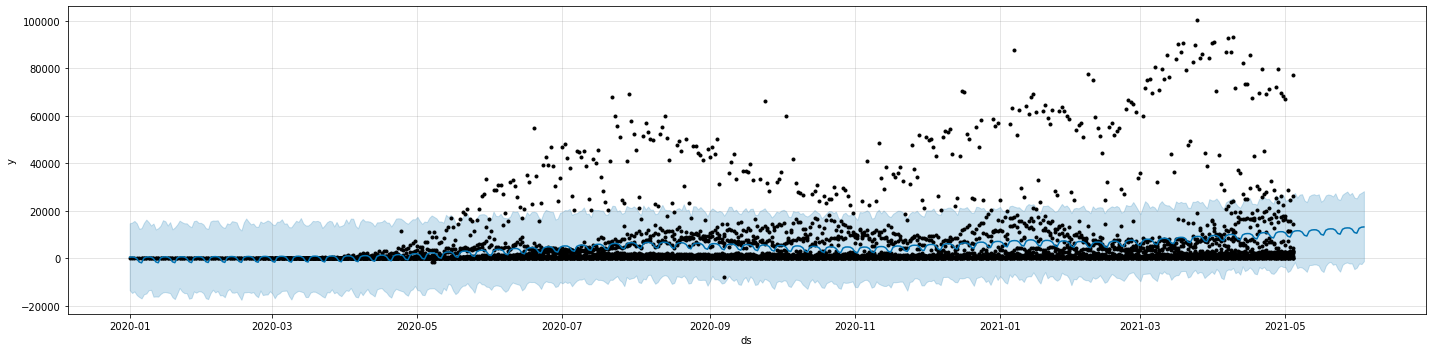

In [ ]:
model.plot(forecast,figsize=(20,5));

In [ ]:
df_cases6=df[df['location']=='India']

In [ ]:
#Forecast for next 30 days of India
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.6)
model.fit(df_cases6)
forecast=model.make_future_dataframe(periods=30,freq='D')#periods is number of days and frequency is D=days,M=months
forecast=model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


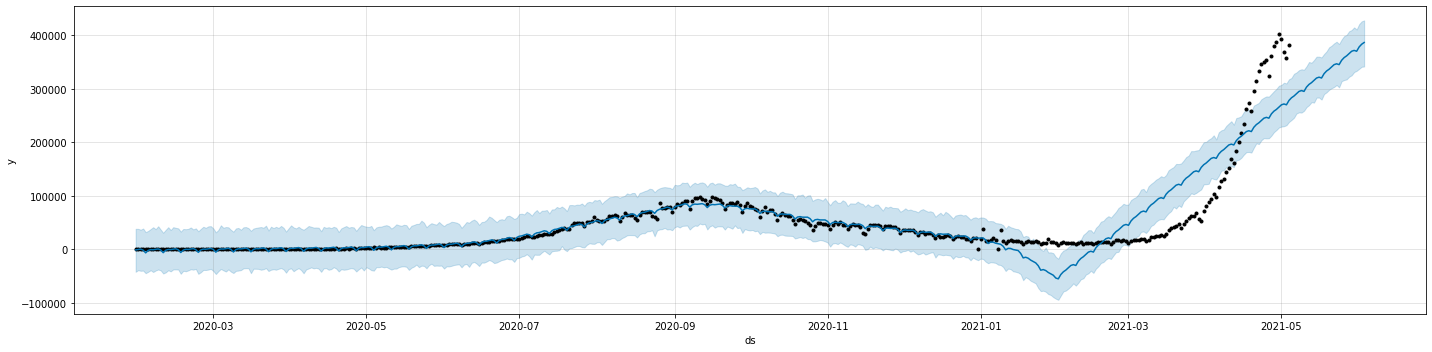

In [ ]:
model.plot(forecast,figsize=(20,5));

In [ ]:
df_cases7=df[df['location']=='United States']

In [ ]:
#Forecast for next 30 days of United States
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.6)
model.fit(df_cases7)
forecast=model.make_future_dataframe(periods=30,freq='D')#periods is number of days and frequency is D=days,M=months
forecast=model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


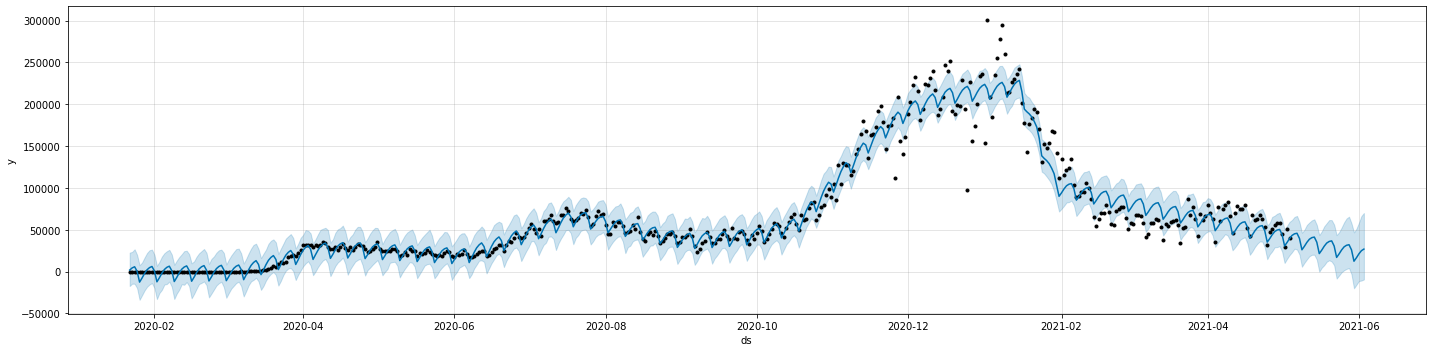

In [ ]:
model.plot(forecast,figsize=(20,5));

In [ ]:
df_cases8=df[df['location']=='United Kingdom']

In [ ]:
#Forecast for next 30 days of United kingdom
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.6)
model.fit(df_cases8)
forecast=model.make_future_dataframe(periods=30,freq='D')#periods is number of days and frequency is D=days,M=months
forecast=model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


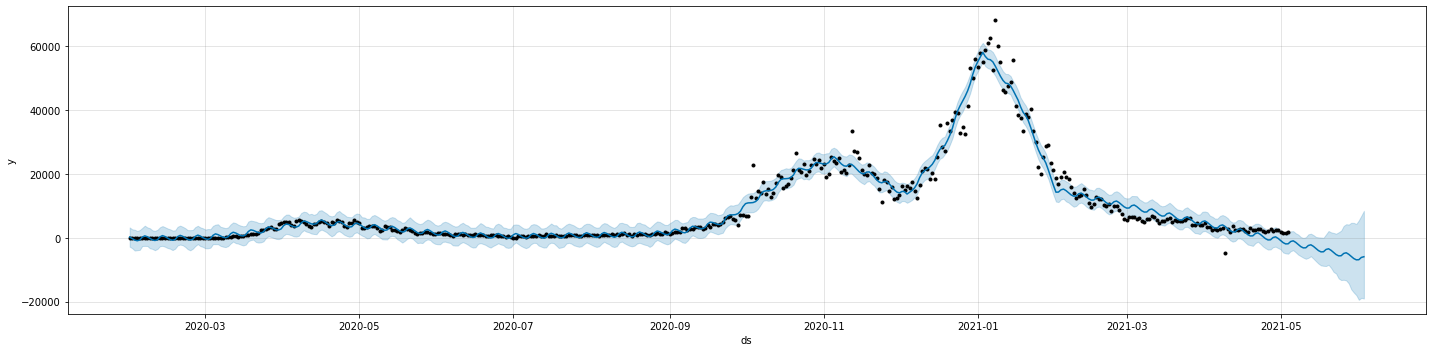

In [ ]:
model.plot(forecast,figsize=(20,5));

In [ ]:
#Which country is having the lowest number of deaths?
df_min_deaths=df[['location','total_deaths']].sort_values('total_deaths')
df_min_deaths['location'][0:1]

0    Afghanistan
Name: location, dtype: object

In [ ]:
#Which country is having the highest number of deaths?
df_max_deaths=df[['location','total_deaths']].sort_values('total_deaths')
df_max_deaths['location'].tail(1)

84774    World
Name: location, dtype: object

In [ ]:
#Which country is having the lowest number of cases?
df_min_cases=df[['location','total_cases']].sort_values('total_cases')
df_min_cases['location'][0:1]

9306    Bermuda
Name: location, dtype: object

In [ ]:
#Which country is having the highest number of cases?
df_max_cases=df[['location','total_cases']].sort_values('total_cases',ascending=False)
df_max_cases['location'][-1:]

31322    Greenland
Name: location, dtype: object